# Завдання

Використовуючи дані з файлу petrol_consumption.csv, побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.

# Розв'язок

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
df = pd.read_csv('petrol_consumption.csv')
df

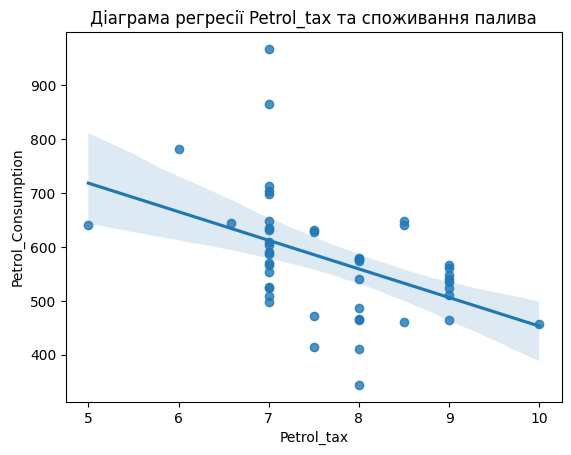

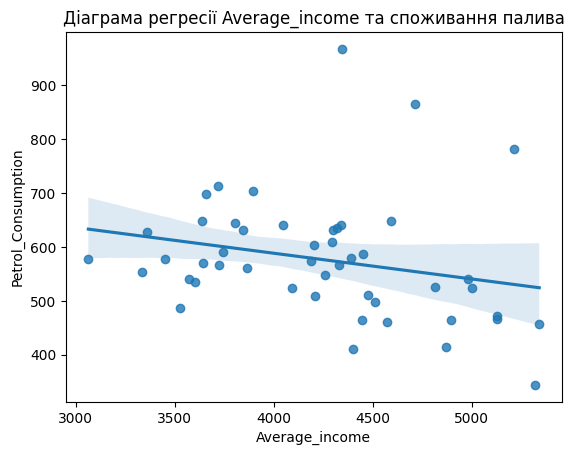

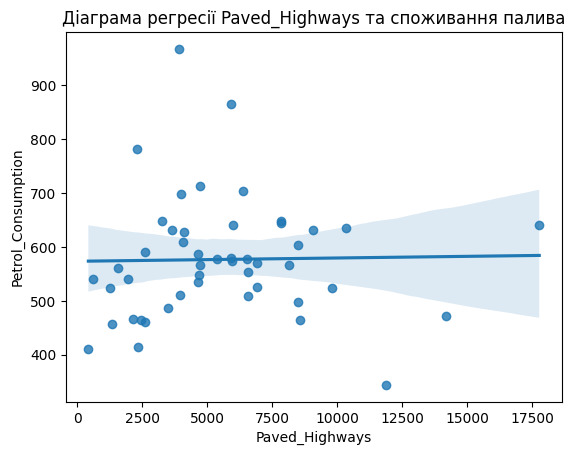

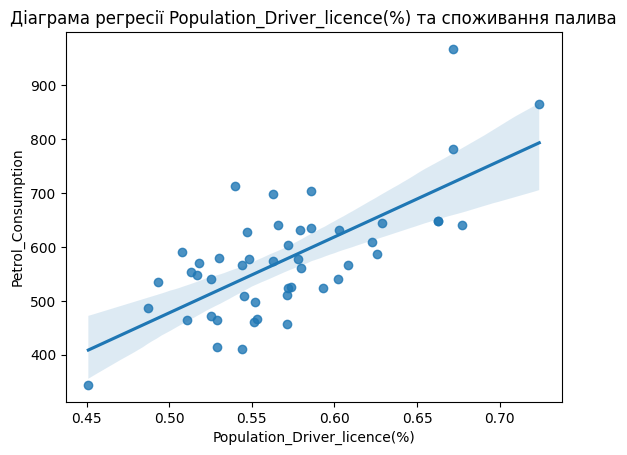

In [15]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in variables:
    plt.figure()
    sb.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Діаграма регресії {var} та споживання палива')

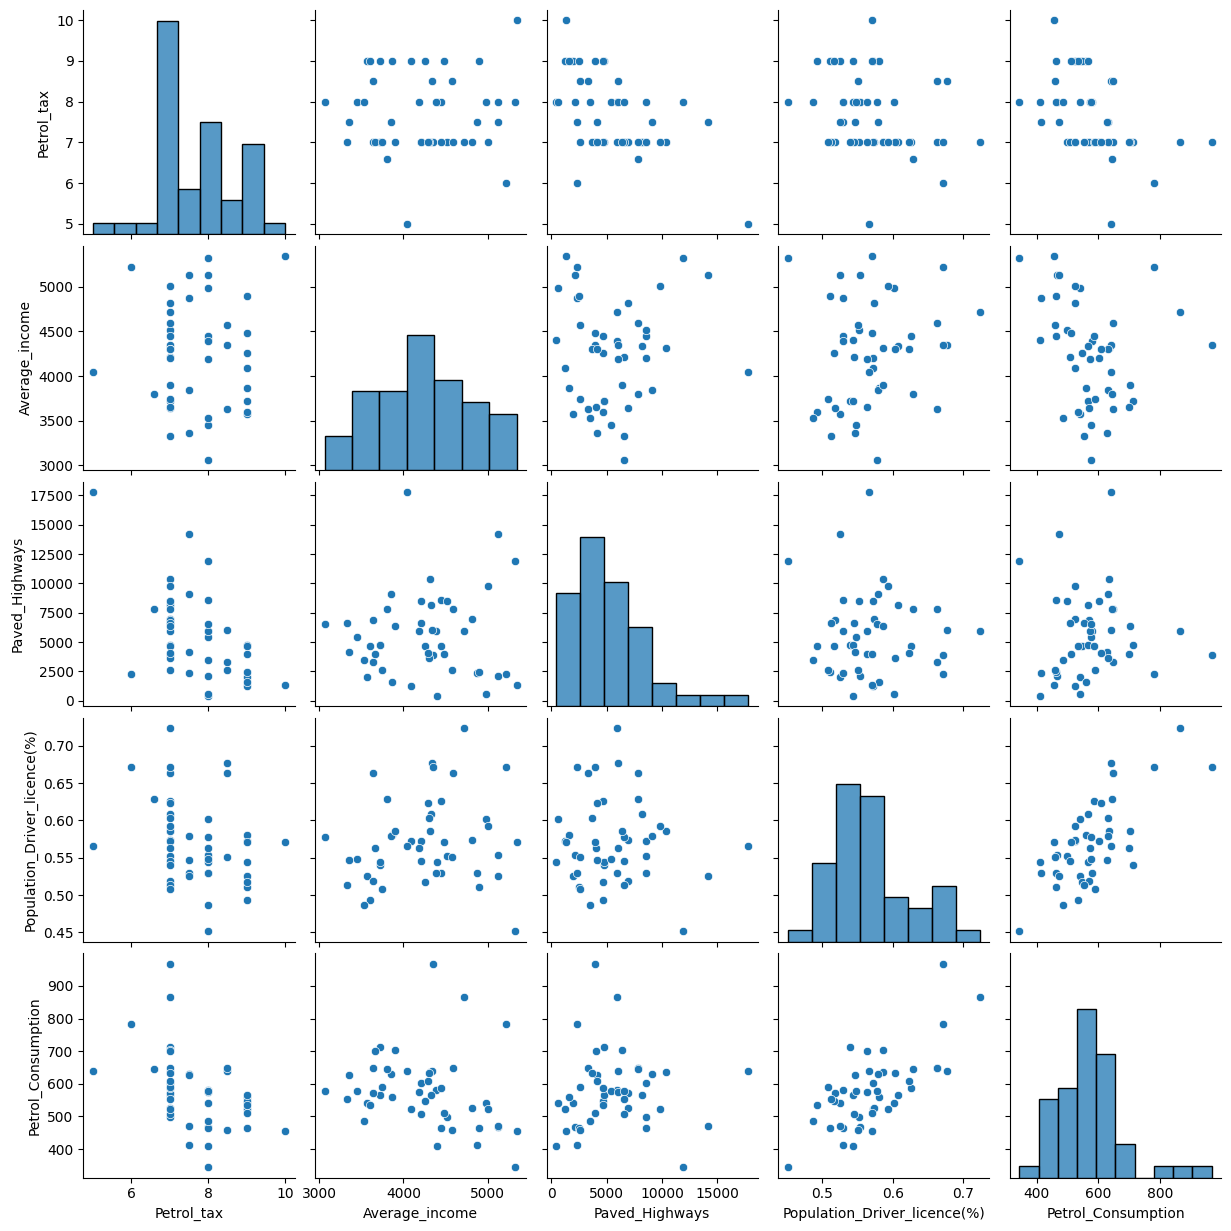

In [27]:
sb.pairplot(df)

In [20]:
correlation = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']].corr()
correlation

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037
Average_income,0.012665,1.000000,0.050163,0.157070
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000


In [21]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [29]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [33]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
print('beta_0:', regression.intercept_)
print('beta_n:', regression.coef_)

beta_0: 344.58590039668604
beta_n: [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [36]:
y_pred = regression.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [38]:
regression.score(X_train, y_train)

0.6895815278628232

In [39]:
regression.score(X_test, y_test)

0.42818683491373977

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Середня абсолютна похибка:', round(mae, 2))
print('Середня квадратична похибка:', round(mse, 2))
print('Корінь середньої квадратичної похибки:', round(rmse, 2))

Середня абсолютна похибка: 58.48
Середня квадратична похибка: 3983.85
Корінь середньої квадратичної похибки: 63.12


Таким чном, враховуючи відносно невеликий обсяг вибірки (48 елементів) та значення показників оцінки якості отриманої регресії (зокрема те, що корінь середньої квадратичної похибки становить 63,12), побудована модель не може бути визнана надійною.